In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [164]:
# creating Database Connection
conn = sqlite3.connect('inventory.db')
 # fetching vendor_summary data
df = pd.read_sql_query(""" select * from vendor_sales_summary""",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,FreightCost,SalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.0,26.27,36.99,145080,3811251.60,68601.68,35.99,142049,5101919.51,260999.20,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.0,23.19,28.99,164038,3804041.22,144929.24,29.99,160247,4819073.49,294438.66,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,1750.0,18.24,24.99,187407,3418303.68,123780.22,24.99,187140,4538120.60,343854.07,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,1750.0,16.17,22.99,201682,3261197.94,257032.07,21.99,200412,4475972.88,368242.80,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,1750.0,21.89,29.99,138109,3023206.01,257032.07,31.99,135838,4223107.62,249587.83,1199901.61,28.412764,0.983556,1.396897


In [166]:
df

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,FreightCost,SalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.0,26.27,36.99,145080,3811251.60,68601.68,35.99,142049,5101919.51,260999.20,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.0,23.19,28.99,164038,3804041.22,144929.24,29.99,160247,4819073.49,294438.66,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,1750.0,18.24,24.99,187407,3418303.68,123780.22,24.99,187140,4538120.60,343854.07,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,1750.0,16.17,22.99,201682,3261197.94,257032.07,21.99,200412,4475972.88,368242.80,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,1750.0,21.89,29.99,138109,3023206.01,257032.07,31.99,135838,4223107.62,249587.83,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10509,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,750.0,1.32,4.99,2,2.64,27100.41,1.99,5,15.95,0.55,13.31,83.448276,2.500000,6.041667
10510,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,50.0,0.39,0.49,6,2.34,50293.62,0.49,134,65.66,7.04,63.32,96.436186,22.333333,28.059829
10511,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,50.0,0.74,0.99,2,1.48,14069.87,0.99,2,1.98,0.10,0.50,25.252525,1.000000,1.337838
10512,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,200.0,1.47,1.99,1,1.47,257032.07,1.99,72,143.28,15.12,141.81,98.974037,72.000000,97.469388


In [170]:
path="D:/downloads/new one downliad/Main Resumes/Project/vendor_summary.xlsx"


In [171]:
df.to_excel(path, index=False)

In [104]:
df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10514.0,10600.166255,18661.457769,2.000000,3924.000000,7153.000000,9552.000000,2.013590e+05
Brand,10514.0,17975.340784,12689.342924,58.000000,5716.750000,18644.000000,25465.750000,9.063100e+04
Volume,10514.0,847.736732,667.959671,50.000000,750.000000,750.000000,750.000000,2.000000e+04
PurchasePrice,10514.0,23.409368,92.170052,0.360000,6.840000,10.450000,19.370000,4.264700e+03
Actual_Price,10514.0,34.340224,126.674964,0.490000,10.990000,15.990000,28.990000,5.799990e+03
TotalPurchaseQuantity,10514.0,3192.852007,11181.338139,1.000000,36.000000,280.500000,2028.750000,3.376600e+05
TotalPurchaseDollars,10514.0,30589.555058,124047.851341,0.710000,479.362500,3836.415000,21280.710000,3.811252e+06
FreightCost,10514.0,61702.836458,61071.434830,0.090000,14836.570000,50293.620000,79528.990000,2.570321e+05
SalesPrice,10514.0,34.061409,126.050680,0.490000,10.990000,15.990000,27.990000,5.799990e+03
TotalSalesQuantity,10514.0,3129.583317,11037.801407,1.000000,36.000000,280.000000,1985.000000,3.349390e+05


In [105]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'Volume',
       'PurchasePrice', 'Actual_Price', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'FreightCost', 'SalesPrice',
       'TotalSalesQuantity', 'TotalSalesDollars', 'TotalExciseTax',
       'GrossProfit', 'ProfitMargin', 'StockTurnover', 'SalesToPurchaseRatio'],
      dtype='object')

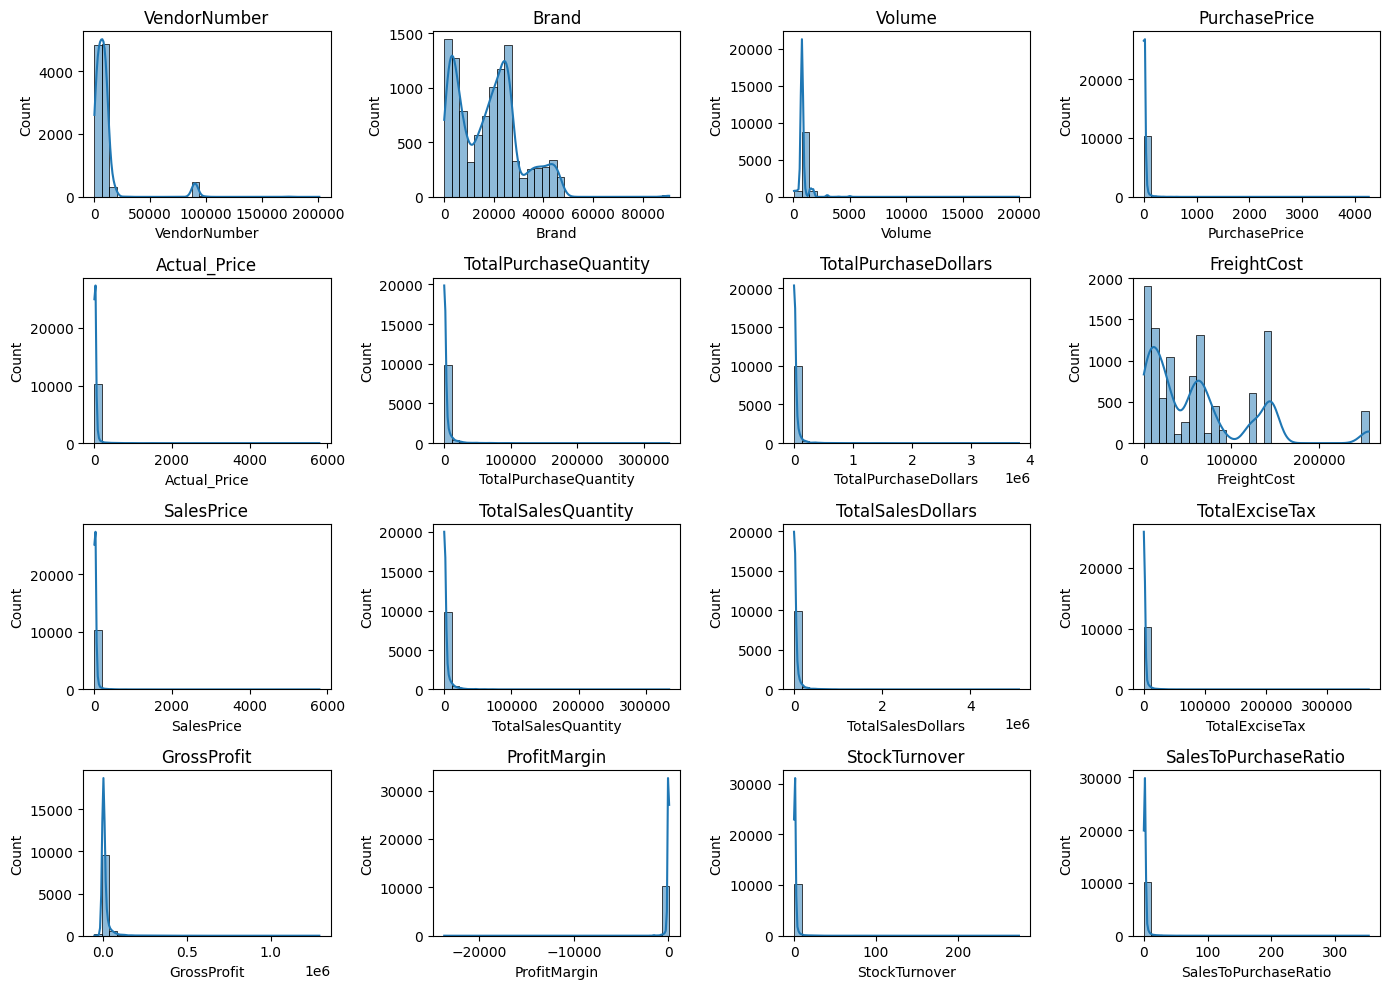

In [106]:
# Distribution plot for numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(14,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  # Adjust grid layout as needed
    sns.histplot(df[col] , kde=True , bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

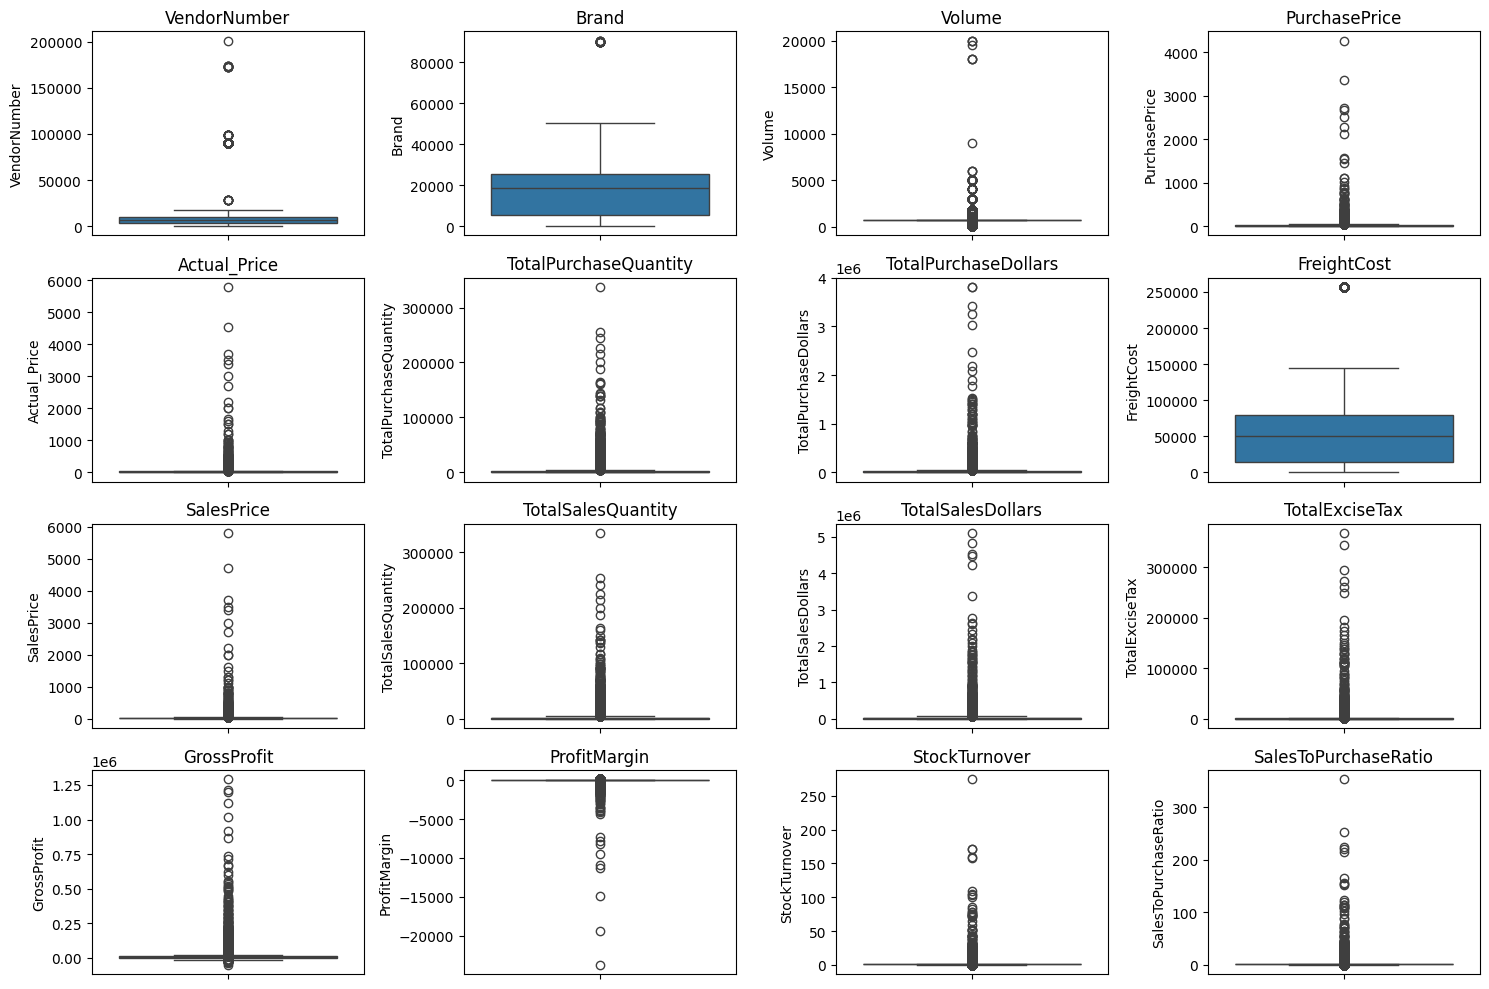

In [107]:
# Outliner detection using box plot


plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  # Adjust grid layout as needed
    sns.boxplot(y=df[col] )
    plt.title(col)
plt.tight_layout()
plt.show()


In [108]:
# data without inconsistencies 
df = pd.read_sql_query(""" SELECT * from vendor_sales_summary where 
GrossProfit > 0 AND 
ProfitMargin > 0 AND
TotalSalesQuantity > 0 """,conn)

In [109]:
df

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,FreightCost,SalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.0,26.27,36.99,145080,3811251.60,68601.68,35.99,142049,5101919.51,260999.20,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.0,23.19,28.99,164038,3804041.22,144929.24,29.99,160247,4819073.49,294438.66,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,1750.0,18.24,24.99,187407,3418303.68,123780.22,24.99,187140,4538120.60,343854.07,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,1750.0,16.17,22.99,201682,3261197.94,257032.07,21.99,200412,4475972.88,368242.80,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,1750.0,21.89,29.99,138109,3023206.01,257032.07,31.99,135838,4223107.62,249587.83,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,750.0,1.32,4.99,2,2.64,27100.41,1.99,5,15.95,0.55,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,50.0,0.39,0.49,6,2.34,50293.62,0.49,134,65.66,7.04,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,50.0,0.74,0.99,2,1.48,14069.87,0.99,2,1.98,0.10,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,200.0,1.47,1.99,1,1.47,257032.07,1.99,72,143.28,15.12,141.81,98.974037,72.000000,97.469388


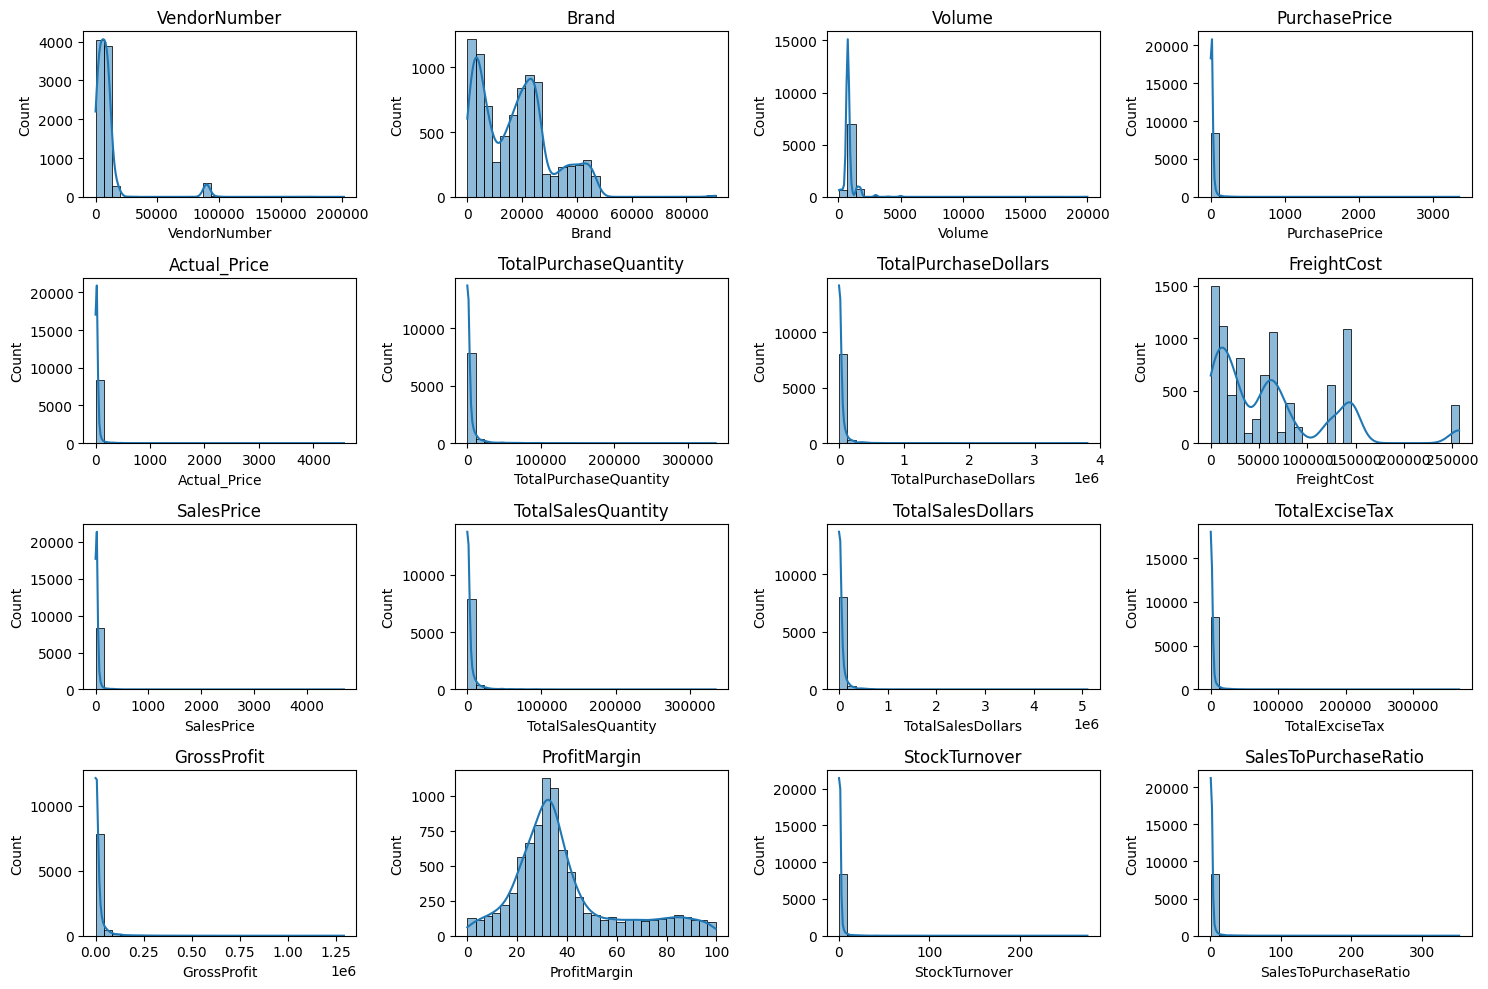

In [110]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)  # Adjust grid layout as needed
    sns.histplot(df[col] , kde=True , bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

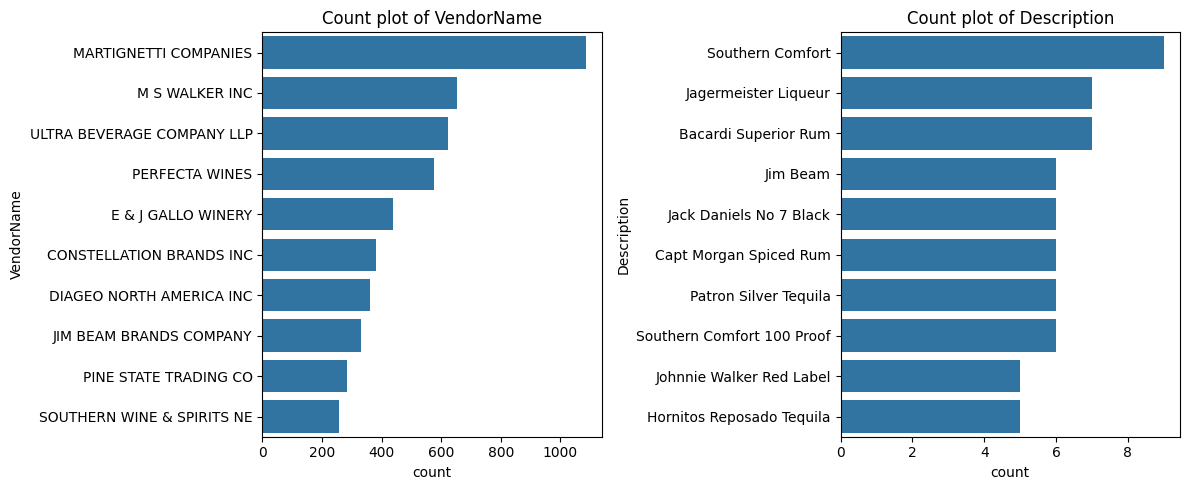

In [111]:
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12,5))
for i , col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()


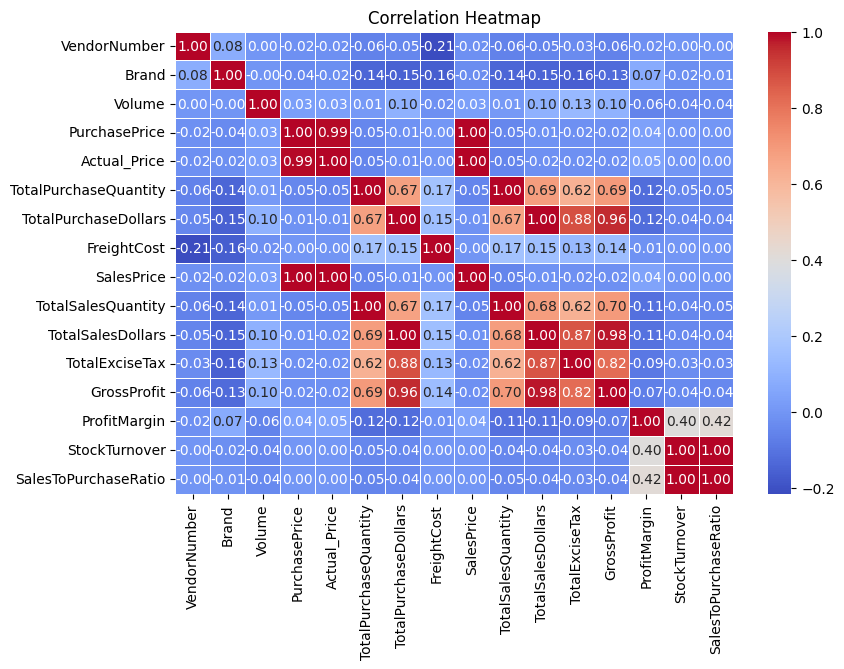

In [112]:
# Correlation Heatmap
plt.figure(figsize=(9,6))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix , annot =True , fmt = ".2f" , cmap ="coolwarm", linewidth=0.5 )
plt.title("Correlation Heatmap")
plt.show()





In [113]:
# Identify brands which need promotional or price adjusments which exhibits lower sales  performance but higher profit margins



In [114]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin': 'mean'}).reset_index()

In [115]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [116]:
low_sales_threshold

np.float64(560.299)

In [117]:
high_margin_threshold

np.float64(64.97017552750113)

In [118]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [119]:
#filered brand with low performance inn sales but with high profitability
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold ) &
     ( brand_performance['ProfitMargin'] >= high_margin_threshold )]

print("Brands with low sales but high profitability:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profitability:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [120]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000 ] # for better visualization

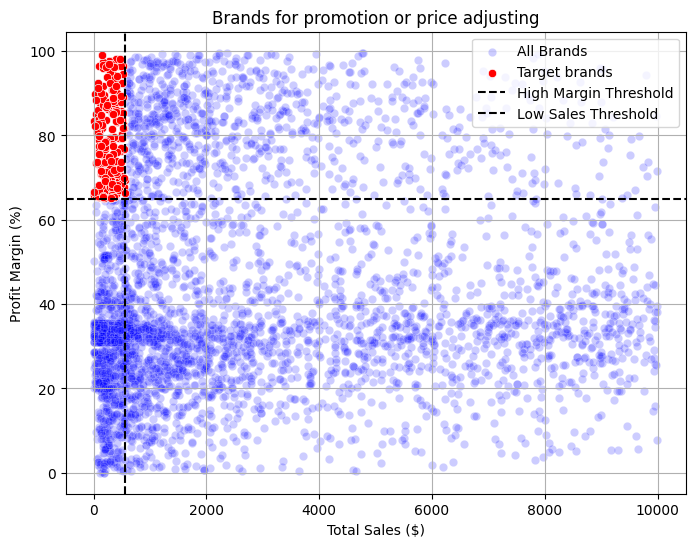

In [121]:
plt.figure(figsize=(8,6))
sns.scatterplot( data = brand_performance , x = 'TotalSalesDollars' , y= 'ProfitMargin', color = 'blue' , label = "All Brands" ,alpha =0.2)
sns.scatterplot( data = target_brands , x = "TotalSalesDollars" , y= "ProfitMargin", color = "red" , label = "Target brands " )

plt.axhline(high_margin_threshold, linestyle='--' , color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color= 'black' , label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.legend()
plt.title("Brands for promotion or price adjusting")
plt.grid(True)
plt.show()

# which vendors and brands demostrate the highest sales performance?

In [122]:
# function to represent values in M = 1000000  and K = 1000
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [123]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)


In [124]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [125]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [126]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

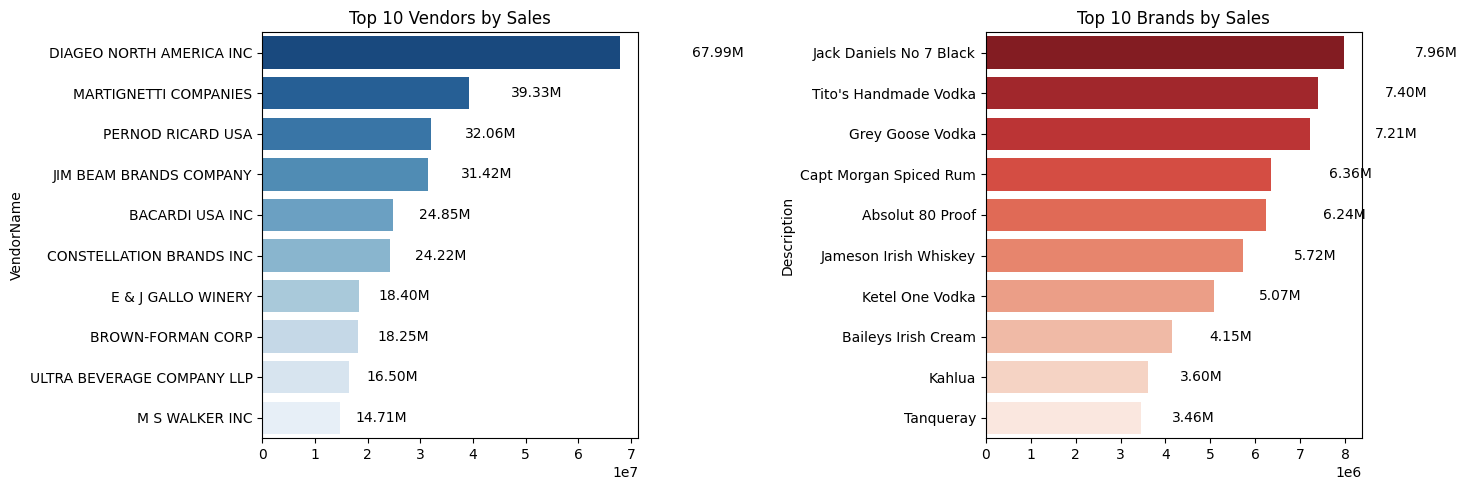

In [127]:
# bar plot for the represenation
plt.figure(figsize=(15,5))

# plot for top vendors
plt.subplot(1,2,1)
ax1= sns.barplot(y=top_vendors.index , x=top_vendors.values, palette='Blues_r')
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+ (bar.get_width()*0.2),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left', va='center',fontsize=10,color='black')

# plot for top brands
plt.subplot(1,2,2)
ax2= sns.barplot(y=top_brands.index , x=top_brands.values, palette='Reds_r')
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width()+ (bar.get_width()*0.2),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left', va='center',fontsize=10,color='black')


plt.tight_layout()
plt.show()

    
    

which vendor contribute the most total purchase dollars?


In [128]:
vendor_performance =df.groupby("VendorName").agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'}).reset_index()


In [129]:
vendor_performance['PurchaseContribution%'] = ((vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum())*100)

In [130]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [131]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [132]:
# display top venodor performance
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply( format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply( format_dollars)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply( format_dollars)

In [133]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [134]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

In [135]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


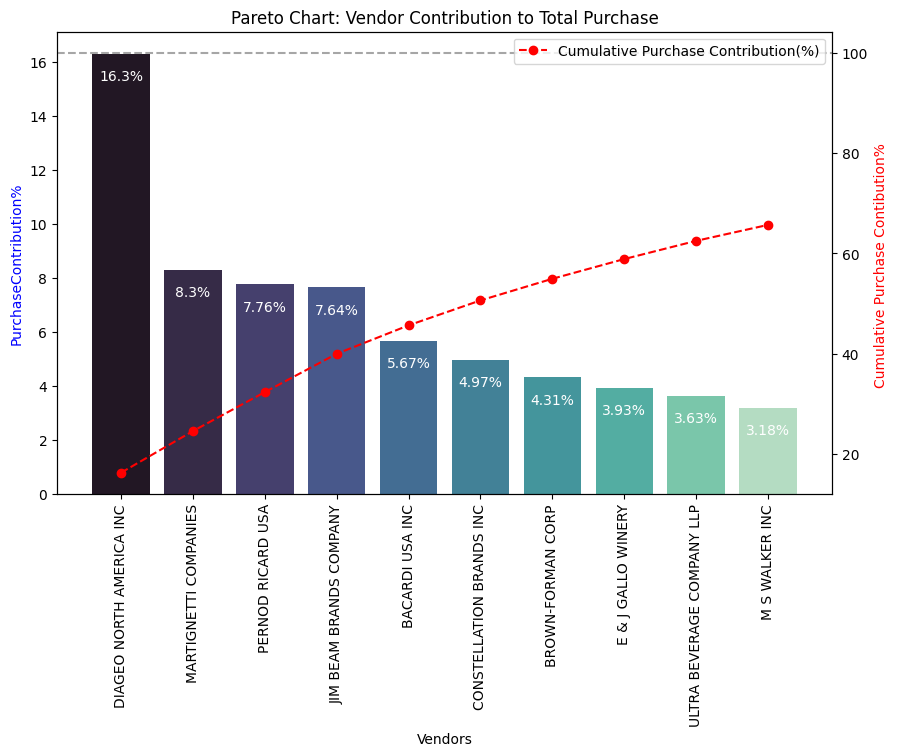

In [136]:
fig,ax1= plt.subplots( figsize =(10,6))
# Bar plot for purchas Contribution
sns.barplot(x=top_vendors['VendorName'] , y= top_vendors['PurchaseContribution%'] , palette='mako' , ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i , value-1, str(value)+'%' , ha = 'center' , fontsize=10, color='white')

# Line plot for cumulative purchase %
ax2= ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'] , color='red',marker='o',linestyle='dashed',label='Cumulative Purchase Contribution(%)')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel ('PurchaseContribution%', color= 'blue')
ax2.set_ylabel('Cumulative Purchase Contibution% ' , color='red')
ax1.set_xlabel('Vendors')
ax1.set_title("Pareto Chart: Vendor Contribution to Total Purchase")

ax2.axhline(y=100, color='grey' , linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

    

How much total Procurement is dependant on the top vendors?


In [137]:
print(f" Total Purchase Contribution % by th top 10 vendors are {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

 Total Purchase Contribution % by th top 10 vendors are 65.69%


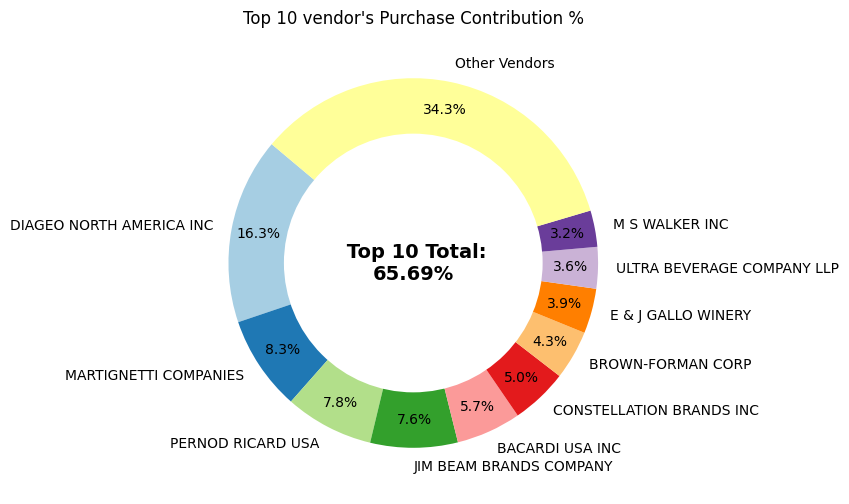

In [138]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contributions = sum(purchase_contributions)
remaining_contributions = 100-total_contributions

#Append "Other Vendor" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contributions)

# Donut Chart
fig , ax = plt.subplots(figsize=(6,6))
wedges, texts , autotexts =ax.pie(purchase_contributions , labels = vendors , autopct='%1.1f%%',
                                  startangle =140, pctdistance=0.85 , colors=plt.cm.Paired.colors)



# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

#Add total contribution annotation in the center
plt.text(0,0,f" Top 10 Total:\n{total_contributions:.2f}%", fontsize=14, fontweight='bold', ha ='center', va ='center')

plt.title("Top 10 vendor's Purchase Contribution %")
plt.show()

Does the bulk purchase reduce the unit cost . What is the optimal purchase volume for cost saving?


In [139]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [140]:
df.head(10)

,VendorNumber,VendorName,Brand,Description,Volume,PurchasePrice,Actual_Price,TotalPurchaseQuantity,TotalPurchaseDollars,FreightCost,SalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,1750.0,26.27,36.99,145080,3811251.60,68601.68,35.99,142049,5101919.51,260999.20,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,1750.0,23.19,28.99,164038,3804041.22,144929.24,29.99,160247,4819073.49,294438.66,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,1750.0,18.24,24.99,187407,3418303.68,123780.22,24.99,187140,4538120.60,343854.07,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,1750.0,16.17,22.99,201682,3261197.94,257032.07,21.99,200412,4475972.88,368242.80,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,1750.0,21.89,29.99,138109,3023206.01,257032.07,31.99,135838,4223107.62,249587.83,1199901.61,28.412764,0.983556,1.396897,21.89
5,480,BACARDI USA INC,3858,Grey Goose Vodka,750.0,17.77,23.99,138809,2466635.93,89286.27,23.99,141860,3383912.40,111699.19,917276.47,27.106980,1.021980,1.371873,17.77
6,17035,PERNOD RICARD USA,2589,Jameson Irish Whiskey,1750.0,30.76,39.99,70783,2177285.08,123780.22,39.99,69627,2773367.73,127931.67,596082.65,21.493098,0.983668,1.273773,30.76
7,3960,DIAGEO NORTH AMERICA INC,3102,Smirnoff Traveler,1750.0,12.94,17.99,161386,2088334.84,257032.07,17.99,148265,2592041.35,272422.60,503706.51,19.432812,0.918698,1.241200,12.94
8,3960,DIAGEO NORTH AMERICA INC,3489,Tanqueray,1750.0,20.73,27.99,91835,1903739.55,257032.07,27.99,90481,2640491.19,166244.44,736751.64,27.902068,0.985256,1.387002,20.73
9,12546,JIM BEAM BRANDS COMPANY,1376,Jim Beam,1750.0,16.29,21.99,108866,1773427.14,123880.97,21.99,107061,2435393.39,196707.35,661966.25,27.181081,0.983420,1.373269,16.29


In [141]:
df['OrderSize']= pd.qcut(df["TotalPurchaseQuantity"], q=3 ,labels=['Small', 'Medium','Large'])

In [142]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [143]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


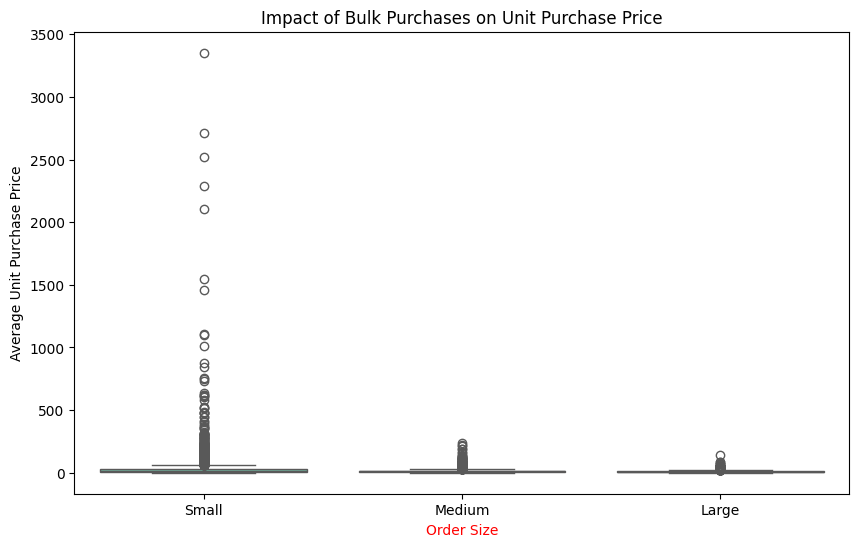

In [144]:
# Boxplot for unit purchase price
plt.figure(figsize=(10,6))
sns.boxplot(data =df , x = 'OrderSize' , y='UnitPurchasePrice' , palette ='Set2')
plt.xlabel("Order Size", color = 'Red')
plt.ylabel("Average Unit Purchase Price")
plt.title("Impact of Bulk Purchases on Unit Purchase Price")
plt.show()

Vendors buying in bulk (Large Order Size) get the lower Unit Purchase Price ($10.77) meaning higher profit margin if they manage inventory efficiently.

which vendors have low inventory turnover indicating excesss stock and slow moving products?

In [145]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [146]:
# how much capital is locked in unsold inventory and which vendor ontributed the most?
df["UnsoldInventory"] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print(f" Total unsold capital : {format_dollars(df['UnsoldInventory'].sum())}")

 Total unsold capital : 2.71M


In [147]:
# vendor who have contributed mostly in the unsold inventory
inventory_value_per_vendor = df.groupby('VendorName')[['UnsoldInventory']].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventory',ascending=False)
inventory_value_per_vendor['UnsoldInventory'] = inventory_value_per_vendor['UnsoldInventory'].apply(format_dollars)
inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventory
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


what is the 95% confidence intervals for profit margins of top performing and low performing vendors

In [148]:
high_threshold = df['TotalSalesDollars'].quantile(0.7)
low_threshold = df['TotalSalesDollars'].quantile(0.2)


In [149]:
top_vendors = df[df['TotalSalesDollars'] >= high_threshold ]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_threshold ]['ProfitMargin'].dropna()

In [150]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
4751    93.085860
4832    90.021514
4833    89.883453
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2569, dtype: float64

In [151]:
def confidence_interval(data, confidence=0.95):
    mean_value =np.mean(data)
    std_err = np.std(data , ddof=1)/ np.sqrt(len(data)) # Standard error
    t_critical =stats.t.ppf((1 + confidence) / 2, df=len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_value ,mean_value-margin_of_error,mean_value+ margin_of_error

Top Vendors 95% CI: (31.06, 31.90 , Mean :31.48
Low Vendors 95% CI: (38.57, 40.85 , Mean :39.71


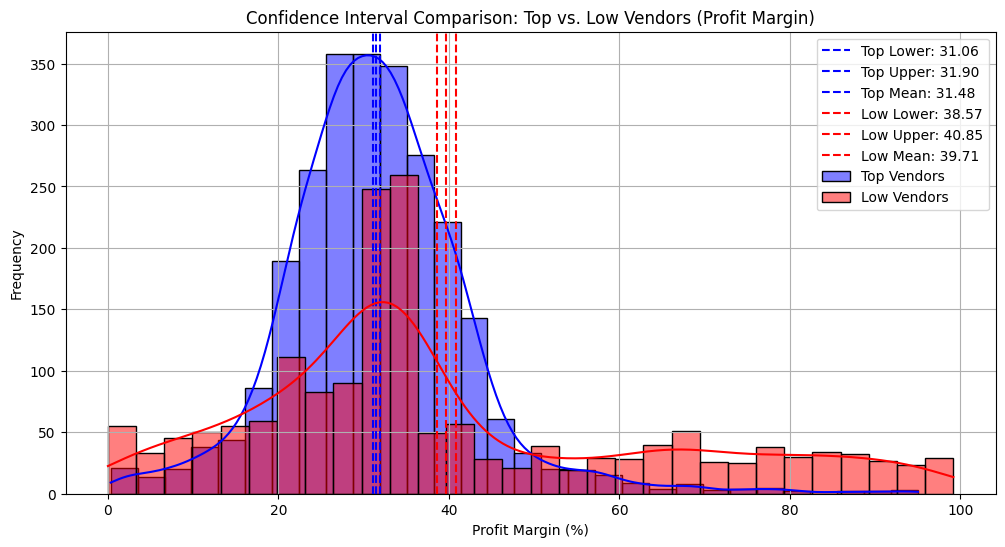

In [152]:
top_mean, top_lower , top_upper = confidence_interval(top_vendors)
low_mean, low_lower , low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f} , Mean :{top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f} , Mean :{low_mean:.2f}")

plt.figure(figsize=(12,6))

#Top Vendor Plot
sns.histplot(top_vendors, kde=True , color='blue', bins=30, alpha=0.5, label= "Top Vendors")
plt.axvline(top_lower, color='blue',linestyle='--',label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color='blue',linestyle='--',label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color='blue',linestyle='--',label=f"Top Mean: {top_mean:.2f}")

# Low Vendor Plot
sns.histplot(low_vendors, kde=True , color='red', bins=30, alpha=0.5, label= "Low Vendors")
plt.axvline(low_lower, color='red',linestyle='--',label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color='red',linestyle='--',label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color='red',linestyle='--',label=f"Low Mean: {low_mean:.2f}")

#Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
